In [52]:
# imports
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import os
from scipy.stats import sem

from fcutils.maths.signals import get_onset_offset
from fcutils.plot.elements import plot_mean_and_error

sys.path.append("./")

fld = Path(os.getcwd()).parent
sys.path.append(str(fld))


from electrophysiology.utils import load_rec_data, get_locomotion_onset_times

cache = Path(r"/Volumes/EGZONA/Egzona/Forceplate/neuropixels")
tracking_files = cache.glob("*.parquet")
recordings = [f.stem for f in tracking_files]
recordings



[
    'FC_210715_AAA1110750_r5_hairpin',
    '._FC_210715_AAA1110750_r5_hairpin',
    'FC_210716_AAA1110750_r6_hairpin',
    '._FC_210716_AAA1110750_r6_hairpin',
    'FC_210720_AAA1110750_hairpin',
    '._FC_210720_AAA1110750_hairpin',
    'FC_210722_AAA1110750_hairpin',
    '._FC_210722_AAA1110750_hairpin',
    'FC_210820_BAA1110281_hairpin',
    '._FC_210820_BAA1110281_hairpin',
    'FC_210829_BAA1110281_hairpin',
    '._FC_210829_BAA1110281_hairpin',
    'FC_210830_BAA1110281_hairpin',
    '._FC_210830_BAA1110281_hairpin',
    'FC_210831_BAA1110281_hairpin',
    '._FC_210831_BAA1110281_hairpin',
    'FC_210906_BAA1110281_hairpin',
    '._FC_210906_BAA1110281_hairpin',
    'FC_210917_BAA1110279_hairpin',
    '._FC_210917_BAA1110279_hairpin',
    'FC_210917_BAA1110281_hairpin',
    '._FC_210917_BAA1110281_hairpin',
    'FC_211022_BAA110516_hairpin',
    '._FC_211022_BAA110516_hairpin',
    'FC_211027_BAA110516_hairpin',
    '._FC_211027_BAA110516_hairpin',
    'FC_211214_BAA110517_hairpin',
    '._FC_211214_BAA110517_hairpin',
    'FC_220114_BAA110517_hairpin',
    '._FC_220114_BAA110517_hairpin',
    'FC_220117_BAA110517_hairpin',
    '._FC_220117_BAA110517_hairpin',
    'FC_220119_BAA110517_hairpin',
    ... +3
]

## Get for each recordings all the time the mouse goes from stationary to moving

In [20]:
tracking, units = load_rec_data(cache, recordings[2])

In [21]:
right_fl_onsets = get_locomotion_onset_times(tracking, "right_fl")
left_fl_onsets = get_locomotion_onset_times(tracking, "left_fl")

print(f"Number of onsets: {len(right_fl_onsets)} right - {len(left_fl_onsets)} left")

Number of onsets: 23 right - 36 left


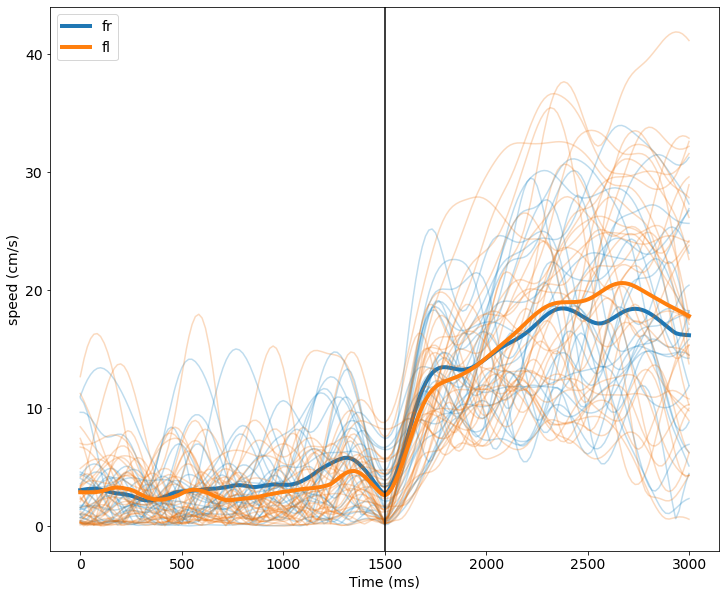

In [22]:
# set font size
plt.rcParams.update({"font.size": 14})

f, ax = plt.subplots(1, 1, figsize=(12, 10))

from analysis.fixtures import dark_colors

for paw, timepoints, sign in zip(("fr", "fl"), (right_fl_onsets, left_fl_onsets), (1, 1)):
    traces = []
    for i, frame in enumerate(timepoints):
        trace = sign * tracking.v[frame-1500:frame+1500].values
        traces.append(trace)
        ax.plot(trace, color = dark_colors[paw], alpha=.25)
    ax.plot(np.mean(traces, axis=0), label=paw, lw=4)


ax.legend()
ax.axvline(1500, color="k")
_ = ax.set(xlabel="Time (ms)", ylabel="speed (cm/s)")

In [30]:
sem(np.zeros((5, 10)), axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

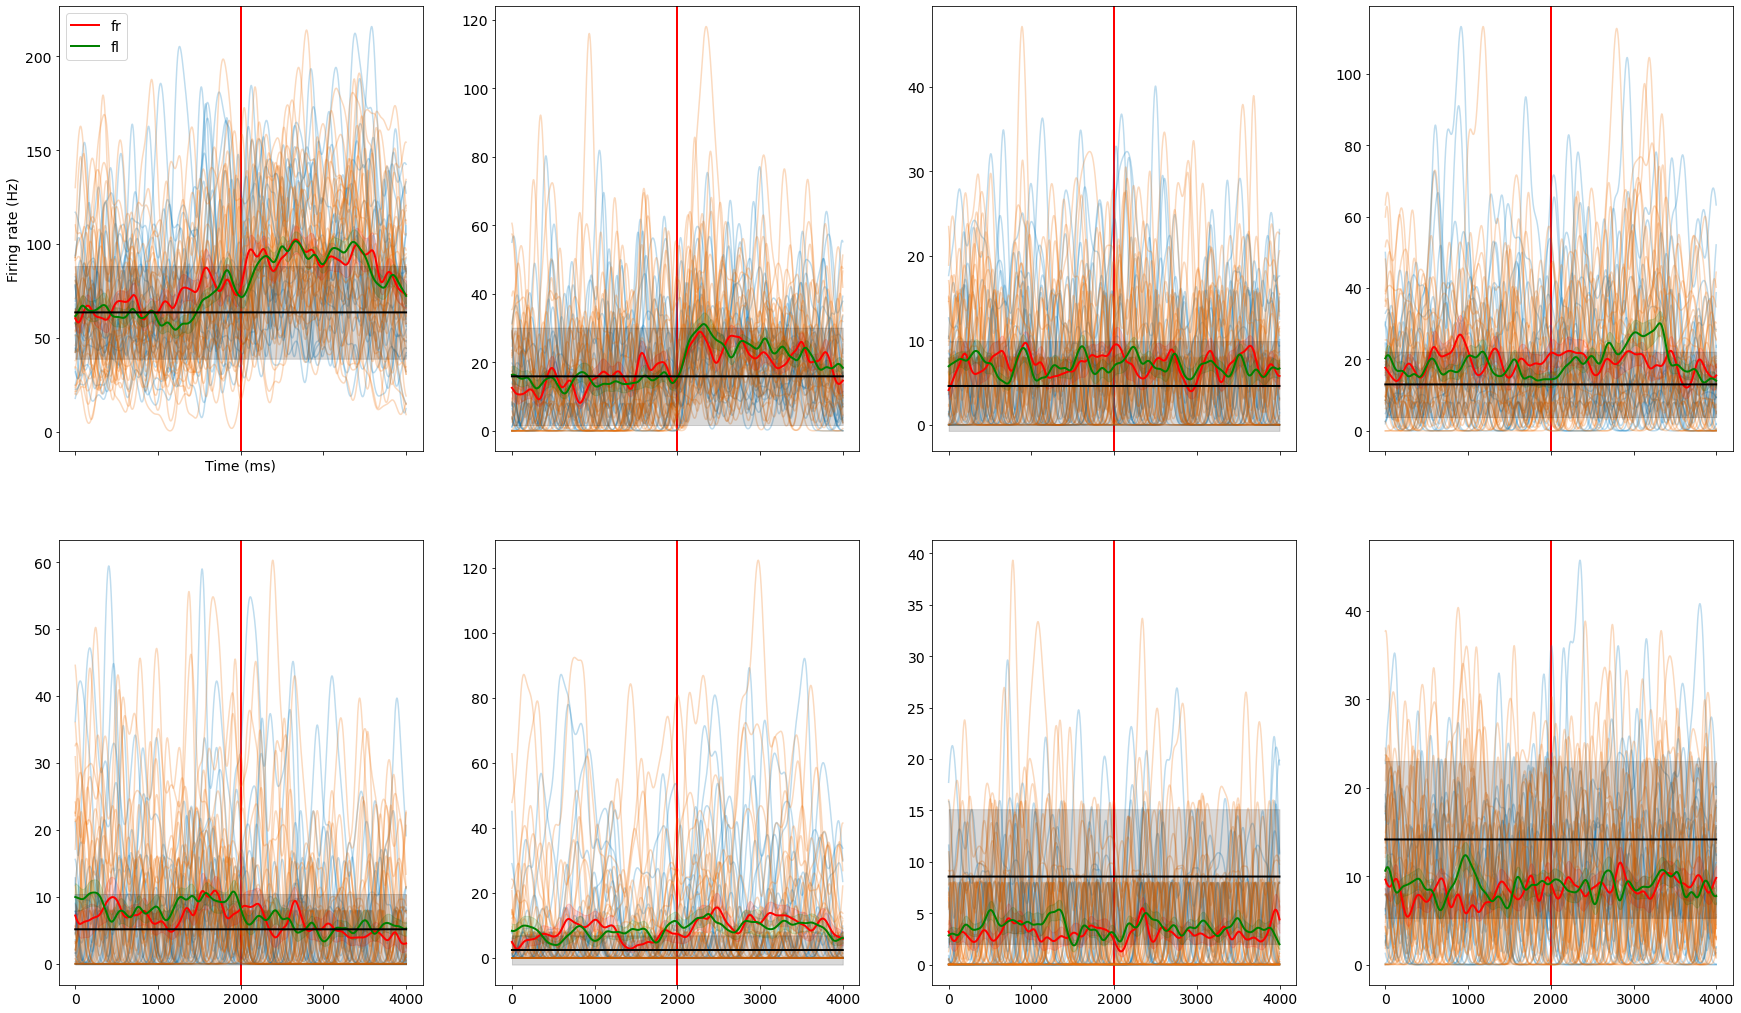

In [80]:
from fcutils.plot.figure import calc_nrows_ncols

figsize = (30, 18)
units_names = units.columns
nrows, ncols = calc_nrows_ncols(len(units_names), aspect=(24, 18))
f, axes = plt.subplots(nrows, ncols, figsize=figsize, sharex=True, sharey=False)
axes = axes.flatten()


for i, (name, ax) in enumerate(zip(units_names, axes)):
    ax.axvline(2000, lw=2, color="r")
    baselines = []
    for paw, timepoints, color in zip(("fr", "fl"), (right_fl_onsets, left_fl_onsets), "rg"):

        traces = []
        for frame in timepoints:
            trace = units[name].values[frame-2000:frame+2000]
            baseline = units[name].values[frame-2000:frame]

            if len(trace) < 4000:
                continue
            traces.append(trace)
            baselines.append(baseline)
            ax.plot(trace, color = dark_colors[paw], alpha=.25)
        # ax.plot(np.mean(traces, axis=0), color=dark_colors[paw], lw=3, label=paw if i == 0 else None)
        plot_mean_and_error(np.mean(traces, axis=0), sem(traces, axis=0), ax, lw=2, label=paw if i == 0 else None, color=color, err_alpha=.15)

    baselines = np.hstack(baseline)
    mu = np.mean(baselines)
    sigma = np.std(baselines)
    plot_mean_and_error(np.repeat(mu, 4000), np.repeat(sigma, 4000), ax, lw=2, color="black", err_alpha=.15)

axes[0].legend()
_ = axes[0].set(xlabel="Time (ms)", ylabel="Firing rate (Hz)")

In [68]:
sigma

7.017511441603664